<center>
#CSCI-P556: Applied Machine Learning
#Fall 2018
#Assignment #2
</center>
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Ans: 
Overall speaking, the number of rows in train1 is nearly 6769 and in train2 we have 28937 rows. In valid1 we have 1693 rows and in valid2 we have 7234 rows. 

In train1.csv :we have labels yes- 3385 no-3384 , while in train2.csv we have  no-25549 yes-3385 which means that we have effectively more examples of no in train2.csv.

Apart from this in valid_1.csv we have yes:846 and no:847 while in valid_2.csv we have yes: 846 and no: 6388, which might help us to infer that there are almost equal samples available for yes and no in train1 and valid1 while there are more no samples in valid2 and train2.



In [360]:
import pandas as pd
dftrain1=pd.read_csv("train_1.csv")
dftrain2=pd.read_csv("train_2.csv")
dfvalid1=pd.read_csv("valid_1.csv")
dfvalid2=pd.read_csv("valid_2.csv")

### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1.   Features with continuous numeric values are : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
2.   Features with categorical values are : [ 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']
       For job,marital,contact,poutcome,month,education I used One Hot encoding and for default,housing,loan,y I used simple encoding of 0-no and yes-1.
       
3.   There are no features with missing values(eg: Nan). But yes there are values with "unknown" as a value itself. "education" is having unknown as its value many times. I gave encoding of 0 to unknown value in education. Rest columns (job,poutcome, contact) I did OneHot Encoding and made seperate columns job_unknown,poutcome_unknown and contact_unknown) . 



In [361]:
# Task1 question 1 :
contfeatures=['age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous']
n = len(contfeatures)
mu=[0]*n
sigma=[0]*n
for i,x in enumerate(contfeatures):
    mu[i]=dftrain1[x].mean()
    sigma[i]=dftrain1[x].std()
    dftrain1[x]=(dftrain1[x]-mu[i])/sigma[i]
for i,x in enumerate(contfeatures):
    mu[i]=dftrain2[x].mean()
    sigma[i]=dftrain2[x].std()
    dftrain2[x]=(dftrain2[x]-mu[i])/sigma[i]
for i,x in enumerate(contfeatures):
    mu[i]=dfvalid1[x].mean()
    sigma[i]=dfvalid1[x].std()
    dfvalid1[x]=(dfvalid1[x]-mu[i])/sigma[i]
for i,x in enumerate(contfeatures):
    mu[i]=dfvalid2[x].mean()
    sigma[i]=dfvalid2[x].std()
    dfvalid2[x]=(dfvalid2[x]-mu[i])/sigma[i]

In [362]:
dftrain1=pd.get_dummies(dftrain1, prefix=['job','marital','contact','poutcome','month','education'], prefix_sep='_', dummy_na=False, columns=['job','marital','contact','poutcome','month','education'], sparse=False, drop_first=False, dtype=None)
dftrain2=pd.get_dummies(dftrain2, prefix=['job','marital','contact','poutcome','month','education'], prefix_sep='_', dummy_na=False, columns=['job','marital','contact','poutcome','month','education'], sparse=False, drop_first=False, dtype=None)
dfvalid1=pd.get_dummies(dfvalid1, prefix=['job','marital','contact','poutcome','month','education'], prefix_sep='_', dummy_na=False, columns=['job','marital','contact','poutcome','month','education'], sparse=False, drop_first=False, dtype=None)
dfvalid2=pd.get_dummies(dfvalid2, prefix=['job','marital','contact','poutcome','month','education'], prefix_sep='_', dummy_na=False, columns=['job','marital','contact','poutcome','month','education'], sparse=False, drop_first=False, dtype=None)

In [363]:
dftrain1["default"] = dftrain1["default"].map({'yes': 1, 'no': 0})
# dftrain1['default']
dftrain1["housing"] = dftrain1["housing"].map({'yes': 1, 'no': 0})
# dftrain1['housing']
dftrain1["loan"] = dftrain1["loan"].map({'yes': 1, 'no': 0})
# dftrain1['loan']
dftrain1["y"] = dftrain1["y"].map({'yes': 1, 'no': 0})

dftrain2["default"] = dftrain2["default"].map({'yes': 1, 'no': 0})
dftrain2["housing"] = dftrain2["housing"].map({'yes': 1, 'no': 0})
dftrain2["loan"] = dftrain2["loan"].map({'yes': 1, 'no': 0})
dftrain2["y"] = dftrain2["y"].map({'yes': 1, 'no': 0})

dfvalid1["default"] = dfvalid1["default"].map({'yes': 1, 'no': 0})
dfvalid1["housing"] =dfvalid1["housing"].map({'yes': 1, 'no': 0})
dfvalid1["loan"] = dfvalid1["loan"].map({'yes': 1, 'no': 0})
dfvalid1["y"] = dfvalid1["y"].map({'yes': 1, 'no': 0})

dfvalid2["default"] = dfvalid2["default"].map({'yes': 1, 'no': 0})
dfvalid2["housing"] =dfvalid2["housing"].map({'yes': 1, 'no': 0})
dfvalid2["loan"] = dfvalid2["loan"].map({'yes': 1, 'no': 0})
dfvalid2["y"] = dfvalid2["y"].map({'yes': 1, 'no': 0})


### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

Accuracy list index for maximum accuracy : 14
Maximum Accuracy : 0.8186650915534555
lambda value for maximum acccuracy is :  8.0


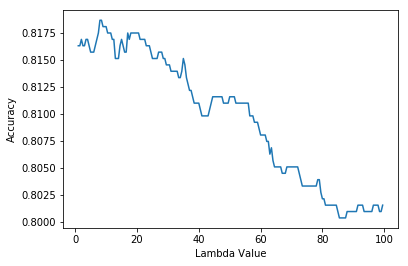

In [364]:
# dftrain1 already contains train1.csv
# dfvalid1 already cntains valid1.csv
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

accuracylist=[]
data=np.arange(1,100,0.5)
lambdavalues=list(data)
for i in range(len(lambdavalues)):
    lambdaval=lambdavalues[i]
    X=dftrain1.drop(['y'],axis=1)
    y=dftrain1['y']
    clf=LogisticRegression(penalty='l2',C= 1/lambdaval,max_iter=100).fit(X,y)
    ypred=clf.predict(dfvalid1.drop(['y'],axis=1))
    accuracy=metrics.accuracy_score(dfvalid1['y'],ypred)
    accuracylist.append(accuracy)  
    

plt.xlabel("Lambda Value")
plt.ylabel("Accuracy")
plt.plot(lambdavalues,accuracylist)
print("Accuracy list index for maximum accuracy :",accuracylist.index(max(accuracylist)))
print("Maximum Accuracy :",max(accuracylist))
print("lambda value for maximum acccuracy is : ",lambdavalues[accuracylist.index(max(accuracylist))])

In [365]:
# Selecting best model in which I have best value of lambda and max_iter
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lambdaval=8
X=dftrain1.drop(['y'],axis=1)
y=dftrain1['y']
clf=LogisticRegression(penalty='l2',C=1/lambdaval).fit(X,y)
# ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

ypred=clf.predict(dfvalid1.drop(['y'],axis=1))
accuracy=metrics.accuracy_score(ypred,dfvalid1['y'])
print(accuracy)


0.8186650915534555


### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

Accuracy list index for maximum accuracy : 25
Maximum Accuracy : 0.9008847110865358
lambda value for maximum acccuracy is :  26


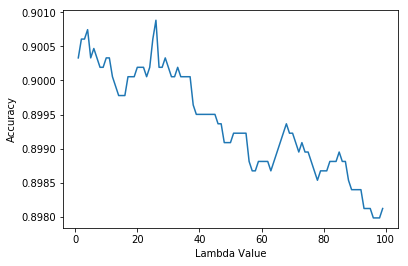

In [366]:
# dftrain2 already contains train2.csv
# dfvalid2 already contains valid2.csv
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

accuracylist=[]
data=np.arange(1,100)
lambdavalues=list(data)
for i in range(len(lambdavalues)):
    lambdaval=lambdavalues[i]
    X=dftrain2.drop(['y'],axis=1)
    y=dftrain2['y']
    clf=LogisticRegression(penalty='l2',C= 1/lambdaval,max_iter=100).fit(X,y)
    ypred=clf.predict(dfvalid2.drop(['y'],axis=1))
    accuracy=metrics.accuracy_score(dfvalid2['y'],ypred)
    accuracylist.append(accuracy)  
    

plt.xlabel("Lambda Value")
plt.ylabel("Accuracy")
plt.plot(lambdavalues,accuracylist)
print("Accuracy list index for maximum accuracy :",accuracylist.index(max(accuracylist)))
print("Maximum Accuracy :",max(accuracylist))
print("lambda value for maximum acccuracy is : ",lambdavalues[accuracylist.index(max(accuracylist))])

In [367]:
# Selecting best model in which I have best value of lambda and max_iter
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lambdaval=26
X=dftrain2.drop(['y'],axis=1)
y=dftrain2['y']
clf=LogisticRegression(penalty='l2',C=1/lambdaval).fit(X,y)
# ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

ypred=clf.predict(dfvalid2.drop(['y'],axis=1))
accuracy=metrics.accuracy_score(ypred,dfvalid2['y'])
print(accuracy)


0.9008847110865358


### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

maximum accuracy achieved is :  0.904202377661045
lambda value achieved is : 3
threshold value achieved is : 0.65


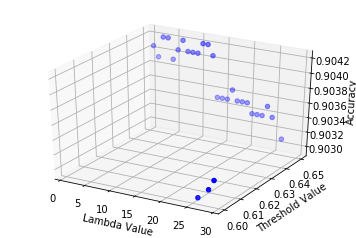

Note the 3D plot of lambda,threshold and accuracy. We notice that as lambda increases accuracy decreases. Thresholds are giving good resuts near 0.65 and Accuracy is high for low values of lambda and thresholds near 0.65


In [368]:
# Selecting best model in which I have best value of lambda and max_iter
######################################################################
# APPROACH: for lamba in 1 to 30:
#               for threshold in arange(0,1,0.5)
#                    logic::
#               local maximum accuracy with lambda (same for all thresholds ie: 0,0.05,0.1,0.15,0.2...) and threshold
#               Keeping this local maxima that we got in list : ie we will have lambda,pvalue at the end
#           Finding global maximum accuracy from all lambda,pvalue pairs that we had
#           NOTE: lambdalater,pvallater,accuracylater will have all values used for finding maximum globally
#####################################################################
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# lambdalater will have all values of lambda
lambdalater=[]
# pvallater will consist of all values of pval(0.5,0.6....thresholds) which will give maximum accuracy for particular lambda
pvallater=[]
# accuracylater will have all values of accuracy which will be highest for particular lambda and threshold in the loop
accuracylater=[]
# NOTE: I tried all lambda values from 1 to 100 and corresponding all values of pval but lambda was still optimal at 3. So 
# in order to decrease computation time for Assignment grading, I reduced lambdavalues range to (1,30)
data=np.arange(1,30)
lambdavalues=list(data)

for i in range(len(lambdavalues)):
    lambdaval=lambdavalues[i]
    
    X=dftrain2.drop(['y'],axis=1)
    y=dftrain2['y']
    clf=LogisticRegression(penalty='l2',C= 1/lambdaval,max_iter=100).fit(X,y)
    ypred=clf.predict_proba(dfvalid2.drop(['y'],axis=1))
    
    yprednewlocal=[]
    localplist=[]
    accuracylocal=0
    accuracyforallpval=[]

    for pval in np.arange(0,1,0.05):
        localplist.append(pval)
        yprednewlocal=[]
        for i in range(len(ypred)):
            if(ypred[i][0]>=pval):
                yprednewlocal.append(0)
            else:
                yprednewlocal.append(1)
#         yforgraph.append(yprednewlocal)
        accuracylocal=metrics.accuracy_score(yprednewlocal,dfvalid2['y'])
        accuracyforallpval.append(accuracylocal)
    maxaccuracy = max(accuracyforallpval)
    max_index = accuracyforallpval.index(maxaccuracy)
    pvallater.append(localplist[max_index])
    lambdalater.append(lambdaval)
    accuracylater.append(maxaccuracy)

max_index=accuracylater.index(max(accuracylater))    
print("maximum accuracy achieved is : ",max(accuracylater))
# print("maximum accuracy is achieved at index :",max_index)
print("lambda value achieved is :",lambdalater[max_index])
print("threshold value achieved is :",pvallater[max_index])

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lambdalater, pvallater, accuracylater, c='b', marker='o')

ax.set_xlabel('Lambda Value')
ax.set_ylabel('Threshold Value')
ax.set_zlabel('Accuracy')

plt.show()
print("Note the 3D plot of lambda,threshold and accuracy. We notice that as lambda increases accuracy decreases. Thresholds are giving good resuts near 0.65 and Accuracy is high for low values of lambda and thresholds near 0.65")

In [369]:
#############################################
# CONFIRMATION OF lambda:3 threshold 0.65 Accuracy: 0.90420 which we got in above step.
# NOTE : This confirmation step may change if lambda,threshold values are different achieved in above cell.  
#############################################
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lambdaval=3
X=dftrain2.drop(['y'],axis=1)
y=dftrain2['y']
clf=LogisticRegression(penalty='l2',C=1/lambdaval).fit(X,y)
ypred=clf.predict_proba(dfvalid2.drop(['y'],axis=1))

yprednew=[]

for i in range(len(ypred)):
    if(ypred[i][0]>=0.65):
        yprednew.append(0)
    else:
        yprednew.append(1)
print("Accuracy achieved is : ",metrics.accuracy_score(yprednew,dfvalid2['y']))


Accuracy achieved is :  0.904202377661045


### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.
2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.



In [370]:
####################################################################################################################
############### Data  Preprocessing steps ##########################################################################
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
dftrain1=pd.read_csv("train_1.csv")
dftrain2=pd.read_csv("train_2.csv")
dfvalid1=pd.read_csv("valid_1.csv")
dfvalid2=pd.read_csv("valid_2.csv")

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
# Task1 question 1 :
contfeatures=['age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous']
n = len(contfeatures)
mu=[0]*n
sigma=[0]*n
for i,x in enumerate(contfeatures):
    mu[i]=dftrain1[x].mean()
    sigma[i]=dftrain1[x].std()
    dftrain1[x]=(dftrain1[x]-mu[i])/sigma[i]
for i,x in enumerate(contfeatures):
    mu[i]=dftrain2[x].mean()
    sigma[i]=dftrain2[x].std()
    dftrain2[x]=(dftrain2[x]-mu[i])/sigma[i]
for i,x in enumerate(contfeatures):
    mu[i]=dfvalid1[x].mean()
    sigma[i]=dfvalid1[x].std()
    dfvalid1[x]=(dfvalid1[x]-mu[i])/sigma[i]
for i,x in enumerate(contfeatures):
    mu[i]=dfvalid2[x].mean()
    sigma[i]=dfvalid2[x].std()
    dfvalid2[x]=(dfvalid2[x]-mu[i])/sigma[i]
dftrain1=pd.get_dummies(dftrain1, prefix=['job','marital','contact','poutcome','month','education'], prefix_sep='_', dummy_na=False, columns=['job','marital','contact','poutcome','month','education'], sparse=False, drop_first=False, dtype=None)
dftrain2=pd.get_dummies(dftrain2, prefix=['job','marital','contact','poutcome','month','education'], prefix_sep='_', dummy_na=False, columns=['job','marital','contact','poutcome','month','education'], sparse=False, drop_first=False, dtype=None)
dfvalid1=pd.get_dummies(dfvalid1, prefix=['job','marital','contact','poutcome','month','education'], prefix_sep='_', dummy_na=False, columns=['job','marital','contact','poutcome','month','education'], sparse=False, drop_first=False, dtype=None)
dfvalid2=pd.get_dummies(dfvalid2, prefix=['job','marital','contact','poutcome','month','education'], prefix_sep='_', dummy_na=False, columns=['job','marital','contact','poutcome','month','education'], sparse=False, drop_first=False, dtype=None)

dftrain1["default"] = dftrain1["default"].map({'yes': 1, 'no': 0})
# dftrain1['default']
dftrain1["housing"] = dftrain1["housing"].map({'yes': 1, 'no': 0})
# dftrain1['housing']
dftrain1["loan"] = dftrain1["loan"].map({'yes': 1, 'no': 0})
# dftrain1['loan']
dftrain1["y"] = dftrain1["y"].map({'yes': 1, 'no': 0})

dftrain2["default"] = dftrain2["default"].map({'yes': 1, 'no': 0})
dftrain2["housing"] = dftrain2["housing"].map({'yes': 1, 'no': 0})
dftrain2["loan"] = dftrain2["loan"].map({'yes': 1, 'no': 0})
dftrain2["y"] = dftrain2["y"].map({'yes': 1, 'no': 0})

dfvalid1["default"] = dfvalid1["default"].map({'yes': 1, 'no': 0})
dfvalid1["housing"] =dfvalid1["housing"].map({'yes': 1, 'no': 0})
dfvalid1["loan"] = dfvalid1["loan"].map({'yes': 1, 'no': 0})
dfvalid1["y"] = dfvalid1["y"].map({'yes': 1, 'no': 0})

dfvalid2["default"] = dfvalid2["default"].map({'yes': 1, 'no': 0})
dfvalid2["housing"] =dfvalid2["housing"].map({'yes': 1, 'no': 0})
dfvalid2["loan"] = dfvalid2["loan"].map({'yes': 1, 'no': 0})
dfvalid2["y"] = dfvalid2["y"].map({'yes': 1, 'no': 0})

dftest=pd.read_csv('test.csv')
contfeatures=['age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous']
n = len(contfeatures)
mu=[0]*n
sigma=[0]*n
for i,x in enumerate(contfeatures):
    mu[i]=dftest[x].mean()
    sigma[i]=dftest[x].std()
    dftest[x]=(dftest[x]-mu[i])/sigma[i]
dftest=pd.get_dummies(dftest, prefix=['job','marital','contact','poutcome','month','education'], prefix_sep='_', dummy_na=False, columns=['job','marital','contact','poutcome','month','education'], sparse=False, drop_first=False, dtype=None)

dftest["default"] = dftest["default"].map({'yes': 1, 'no': 0})
dftest["housing"] = dftest["housing"].map({'yes': 1, 'no': 0})
dftest["loan"] = dftest["loan"].map({'yes': 1, 'no': 0})
dftest["y"] = dftest["y"].map({'yes': 1, 'no': 0})


####################################################################################################################
####################################################################################################################
#####################################  MODEL A #####################################################
lambdavalA=int(8)
X=dftrain1.drop(['y'],axis=1)
y=dftrain1['y']
clf=LogisticRegression(penalty='l2',C=1/lambdavalA).fit(X,y)

ypred=clf.predict(dftrain1.drop(['y'],axis=1))
trainaccuracyA=metrics.accuracy_score(ypred,dftrain1['y'])

ypred=clf.predict(dfvalid1.drop(['y'],axis=1))
validaccuracyA=metrics.accuracy_score(ypred,dfvalid1['y'])


ypred=clf.predict(dftest.drop(['y'],axis=1))
testaccuracyA=metrics.accuracy_score(ypred,dftest['y'])
# print(trainaccuracyA,validaccuracyA,testaccuracyA)

############################################################################################################################
#####################################  MODEL B #####################################################

# Selecting best model in which I have best value of lambda and max_iter
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lambdavalB=26
X=dftrain2.drop(['y'],axis=1)
y=dftrain2['y']

clf=LogisticRegression(penalty='l2',C=1/lambdavalB).fit(X,y)

ypred=clf.predict(dftrain2.drop(['y'],axis=1))
trainaccuracyB=metrics.accuracy_score(ypred,dftrain2['y'])

ypred=clf.predict(dfvalid2.drop(['y'],axis=1))
validaccuracyB=metrics.accuracy_score(ypred,dfvalid2['y'])


ypred=clf.predict(dftest.drop(['y'],axis=1))
testaccuracyB=metrics.accuracy_score(ypred,dftest['y'])

# print(trainaccuracyB,validaccuracyB,testaccuracyB)


############################################################################################################################
#####################################  MODEL C #####################################################

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lambdaval=3
X=dftrain2.drop(['y'],axis=1)
y=dftrain2['y']
clf=LogisticRegression(penalty='l2',C=1/lambdaval).fit(X,y)

ypred=clf.predict_proba(dftrain2.drop(['y'],axis=1))
yprednew=[]
for i in range(len(ypred)):
    if(ypred[i][0]>=0.65):
        yprednew.append(0)
    else:
        yprednew.append(1)
trainaccuracyC=metrics.accuracy_score(yprednew,dftrain2['y'])


ypred=clf.predict_proba(dfvalid2.drop(['y'],axis=1))
yprednew=[]
for i in range(len(ypred)):
    if(ypred[i][0]>=0.65):
        yprednew.append(0)
    else:
        yprednew.append(1)
validaccuracyC=metrics.accuracy_score(yprednew,dfvalid2['y'])


ypred=clf.predict_proba(dftest.drop(['y'],axis=1))
yprednew=[]
for i in range(len(ypred)):
    if(ypred[i][0]>=0.65):
        yprednew.append(0)
    else:
        yprednew.append(1)
testaccuracyC=metrics.accuracy_score(yprednew,dftest['y'])
# print(trainaccuracyC,validaccuracyC,testaccuracyC)
#############################################################################################################################
################################################################################################################################
print("ANSWER Task 5.1 ###################################################################################################")
print("############################ Performance of all models with Train Validation and Test Accuracy#####################")
print("###################################################################################################################")
print("            Train Error   Validation Error    Test Error")
print("MODEL A        {:.4f}        {:.4f}              {:.4f}  ".format(trainaccuracyA,validaccuracyA,testaccuracyA))
print("MODEL B        {:.4f}        {:.4f}              {:.4f}  ".format(trainaccuracyB,validaccuracyB,testaccuracyB))
print("MODEL C        {:.4f}        {:.4f}              {:.4f}  ".format(trainaccuracyC,validaccuracyC,testaccuracyC))

print("###################################################################################################################")
print("########################################## Intuition for Model A , B and C ######################################")
print("###################################################################################################################")
print("MODEL A: overfits the model somewhat because it has less training samples")
print("MODEL B: gives good result as there are more training data and as it uses best value among all possible values of lambda ")
print("Model C: gives best result using Logistic regression as it uses large training data as well as it tunes both parameters threshold and lambda in order to achieve best accuracy as much as it can.")

print("\nModel A has less number of training samples(6769) as compared to training samples provided for Model B and Model C(28937). Now it is obvious to us that if a model is having more training data, the model will be more accurate. Thus Model B and Model C will be more accurate as compared to model A(provided we have applied same ML algorithm ie Logistic Regression)")

print("\nThus Model B and C will have higher accuracy as compared to Model A as Model A overfits the data.")

print("\nModel B and Model C uses tuning of hyperparameter lambda for L2 regularization.Model B has slightly less accuracy as compared to Model C because Model C uses parameter tuning of lambda as well as threshold. In Model C we adjust almost all possibilities of threshold and lambda and at the end receive the best parameters for which we have high accuracy")

print("\n Thus Model C appears to have slightly more accuracy than Model B.")
print("\n###################################################################################################################")
print("ANSWER task 5.2  ####################################################################################################")
print("A BIG NO for \"Accuracy\" as a metric to evaluate models, especially in classification tasks. A single one line proof for Why I dont feel accuracy is a good parameter to evaluate this model on is : We have 28,934 total number of samples in train2.csv and almost 25549 are having \"no\" as target variable, which means 88% of samples are already negative. Now what happens is Suppose your model evaluates in terms of accuracy ,AND IF YOU DESIGN MODEL WHICH predicts ALL VALUES AS \"no\", what will happen is you will have accuracy of 88% . YIPIEEEEE. Is your classifier even doing anything? A BIG NO. Thus I feel accuracy is not a metric to evaluate a classification model")
print("\n IN short : If classifier predicts all values \"no\": Accuracy on train2 is nearly 88% which is totally unfair!!!")
print("Moreover It MIGHT be used when we have equal distribution of samples in YES AND NO target values in test dataset. And yes, this might not be the case all time. Thus I feel we should use precision and recall here instead of using accuracy as a metric. ")
print("precision = TP/(TP + FP) and recall = TP/(TP + FN).SO precision is: \"out of all the examples the classifier labeled as positive, what fraction were correct?\" and recall is:\" out of all the positive examples there were, what fraction did the classifier pick up!!\"")
print("My point of view is we should tweak values of precision and recall and see what matters most to us in certain cases. Because what happens is according to different testcases, importance of precision and recall matters. The higher the vlaue of precision and recall, the better is the model. Moreover, we can also use F Measure or F Score which combines precision and recall into one metric. ")
print("        Fmeasure = (2*precision*recall)/(precision+recall)  ")

ANSWER Task 5.1 ###################################################################################################
############################ Performance of all models with Train Validation and Test Accuracy#####################
###################################################################################################################
            Train Error   Validation Error    Test Error
MODEL A        0.8322        0.8187              0.7573  
MODEL B        0.9017        0.9009              0.9004  
MODEL C        0.9025        0.9042              0.9036  
###################################################################################################################
########################################## Intuition for Model A , B and C ######################################
###################################################################################################################
MODEL A: overfits the model somewhat because it has less training samples
M

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

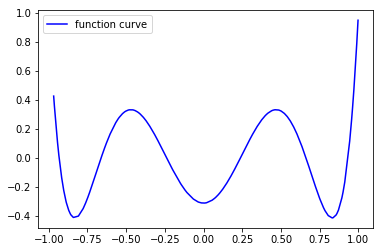

In [382]:
import numpy as np
from scipy.special import legendre
import matplotlib.pyplot as plt
%matplotlib inline
def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::]
# I just removed -1 because I wanted to use my polyval(w,x) function which multiplies in order starting from 
# w_degree*x^degree +...+ w_2*x^2  + w_1*x^1  + w_0*x^0 

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
#     print(w)
    x=np.random.uniform(low=low, high=high, size=(200,))
    x=np.sort(x)
#     print(x)
    
    y=np.polyval(w,x)
#     print("y is : ",y)
    plt.plot(x,y,'b',label="function curve")
    plt.legend()
    pass

## TEST CASES (The following lines should plot a function)
# visualize_function(3, -1, 1)
# visualize_function(4, -1, 1)
visualize_function(6, -1, 1)

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [383]:
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    w = get_coefficients(degree)
#     print(w)
    X_train=np.random.uniform(low=-1, high=1, size=(n_train,))
    X_train=np.sort(X_train)
    y_train=np.polyval(w,X_train) + np.random.normal(0, sigma, 1)
    X_test=np.random.uniform(low=-1, high=1, size=(n_test,))
    X_test=np.sort(X_test)
    y_test=np.polyval(w,X_test) + np.random.normal(0, sigma, 1)
    return X_train, y_train, X_test, y_test
generate_dataset(3,5,3,1)

(array([-0.72555615, -0.62664945,  0.4368021 ,  0.9123629 ,  0.98911513]),
 array([-1.2293707 , -1.03803801, -1.80966832, -0.8327188 , -0.42723934]),
 array([-0.63173364, -0.60204347,  0.05199861]),
 array([ 0.07353557,  0.11375647, -0.32141899]))

### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 - Give a detailed explanation of why this happens.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

In [403]:
import matplotlib.pyplot as plt
%matplotlib inline 
# ###################Task 3 Question 1 goes here #######################33333
X_train, y_train, X_test, y_test = generate_dataset(10,20,20,0.2)


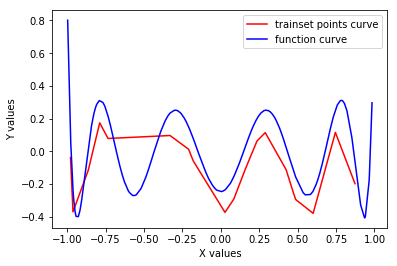

In [404]:
###########################################################################
# Task 3 Question 2 goes here 
# NOTE: I was not knowing what to plot for Xtrain and y train (curve or points). Monday ie 10/8 ,I couldnt find  AI 
# after class,So had to do this way. I am plotting curve here and in next cell I am plotting points of 
# Xtrain and y train(Just for AIs to know that I am aware how to plot, so It doesnt affect grade)
plt.plot(X_train,y_train,'r',label="trainset points curve")
visualize_function(10,-1,+1)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()

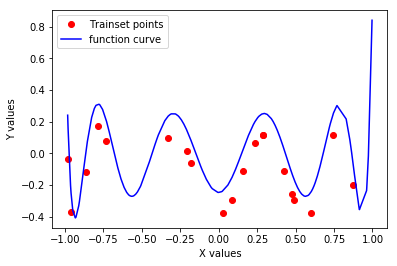

In [405]:
# Task 3 Question 2 goes here 
# Plotting points of X_train and y_train
plt.plot(X_train,y_train,'ro',label="Trainset points")
visualize_function(10,-1,+1)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()


In [406]:
###############################################################
# Task 3 Question 3: How should you create such Linear Regression Models?
# My way is: Create 1,x,x^2 as features for model that requires degree=2 and for Linear Regression model which requires 
# degree =10 , take features as 1,X^2,X^3,X^4....X^10. Moreover keep y_train same for both the models and let it tweak the
# values of weights to get upto it!!!

# Task 3 Question 3 : For Degree equals 2
###############################################################
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

degree=2

poly = PolynomialFeatures(degree)
X_train=X_train.reshape(len(X_train),1)
# print("X train is : ",X_train)
X=poly.fit_transform(X_train).reshape(len(X_train),degree+1)
# print("X is : ",X)
reg = LinearRegression().fit(X, y_train)
# train_accuracy_2=reg.score(X, y_train)
y_pred=reg.predict(X)
trainerror2=mean_squared_error(y_train,y_pred)
print("Training error for Degree 2 Model is : ",mean_squared_error(y_train,y_pred))

poly = PolynomialFeatures(degree)
X_test=X_test.reshape(len(X_test),1)
X=poly.fit_transform(X_test).reshape(len(X_test),degree+1)
y_pred=reg.predict(X)
# test_accuracy_2= reg.score(X, y_test)
testerror2=mean_squared_error(y_test,y_pred)
print("Testing error for Degree 2 Model  is : ",mean_squared_error(y_test,y_pred))

# print(reg.coef_)
# print(reg.intercept_) 

Training error for Degree 2 Model is :  0.03141954133001551
Testing error for Degree 2 Model  is :  0.049026010963348576


In [407]:
# Task 3 Question 3 : For Degree equals 10
###############################################################
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

degree=10

poly = PolynomialFeatures(degree)
X_train=X_train.reshape(len(X_train),1)
# print("X train is : ",X_train)
X=poly.fit_transform(X_train).reshape(len(X_train),degree+1)
# print("X is : ",X)
reg = LinearRegression().fit(X, y_train)
# train_accuracy_10=reg.score(X, y_train)
y_pred=reg.predict(X)
trainerror10 = mean_squared_error(y_train,y_pred)
print("Training error for Degree 10 Model is : ",mean_squared_error(y_train,y_pred))

poly = PolynomialFeatures(degree)
X_test=X_test.reshape(len(X_test),1)
X=poly.fit_transform(X_test).reshape(len(X_test),degree+1)
y_pred=reg.predict(X)
# test_accuracy_10= reg.score(X, y_test)
testerror10 = mean_squared_error(y_test,y_pred)
print("Testing error for Degree 10 Model  is : ",mean_squared_error(y_test,y_pred))

# print(reg.coef_)
# print(reg.intercept_) 

Training error for Degree 10 Model is :  1.2086507707440444e-27
Testing error for Degree 10 Model  is :  0.026271710020327695


In [408]:
# Task 3 Question 4
print("Degree   Training Error Testing Error")
print("  2        {0:1f}       {1:3f}".format(trainerror2,testerror2))
print("  10       {0:1f}       {1:3f}".format(trainerror10,testerror10))

Degree   Training Error Testing Error
  2        0.031420       0.049026
  10       0.000000       0.026272


It was totally what I had expected.
now comes point WHY degree 2 gave less accuracy as compared to degree 10 and Why degree 10 gave error almost 0? Why exactly degree 10?
The answers to above questions are here : NOTE that we had generated dataset with degree = 10. It means ytrain and ytest were generated itself with degrees of freedom equals to 10. ie they would have generated by doing y=w0*1 + w1*x^1 +w2*x^2 + w3*x^3 + w4*x^4 + ....w10*x^10
Now what happens is in degree equals 2 our model does y=w0*1 + w1*x^1 +w2*x^2. Thus it will try its level best to fit the model but as y has maximum degree of freedom as 2, it cannot go beyond some particular accuracy. It would not be able to generate more accurate results
While what happens in degree= 10 is that: It does y=w0*1 + w1*x^1 +w2*x^2 + w3*x^3 + w4*x^4 + ....w10*x^10 !!! exactly same as it was done to generate the model. The Linear Regression Model tries best to learn and tweak the model and it successfully does so!! Thus train and test

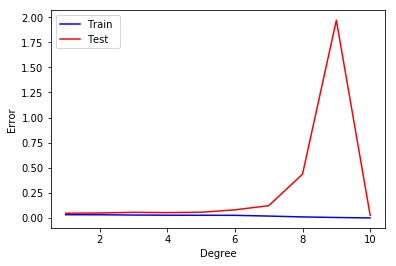

In [409]:
# Task 3 question 5
###############################################################
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

print("It was totally what I had expected.") 
print("now comes point WHY degree 2 gave less accuracy as compared to degree 10 and Why degree 10 gave error almost 0? Why exactly degree 10?")
print("The answers to above questions are here : NOTE that we had generated dataset with degree = 10. It means ytrain and ytest were generated itself with degrees of freedom equals to 10. ie they would have generated by doing y=w0*1 + w1*x^1 +w2*x^2 + w3*x^3 + w4*x^4 + ....w10*x^10")
print("Now what happens is in degree equals 2 our model does y=w0*1 + w1*x^1 +w2*x^2. Thus it will try its level best to fit the model but as y has maximum degree of freedom as 2, it cannot go beyond some particular accuracy. It would not be able to generate more accurate results")
print("While what happens in degree= 10 is that: It does y=w0*1 + w1*x^1 +w2*x^2 + w3*x^3 + w4*x^4 + ....w10*x^10 !!! exactly same as it was done to generate the model. The Linear Regression Model tries best to learn and tweak the model and it successfully does so!! Thus train and test error should be zero!! BUT there will be some noise that will variant in train and test error. No doubt the training error will be nearly 0 as it will be able to handle noise in its x^0*w1 part and learn it accordingly but due to variance in producing noise, it will have some slightly test error ")
trainerrorlist=[]
testerrorlist=[]
for degree in range(1,11):
    poly = PolynomialFeatures(degree)
    X_train=X_train.reshape(len(X_train),1)
    # print("X train is : ",X_train)
    X=poly.fit_transform(X_train).reshape(len(X_train),degree+1)
    # print("X is : ",X)
    reg = LinearRegression().fit(X, y_train)
    # train_accuracy_10=reg.score(X, y_train)
    y_pred=reg.predict(X)
    trainerror = mean_squared_error(y_train,y_pred)
    trainerrorlist.append(trainerror)
#     print("Training error for Degree 10 Model is : ",mean_squared_error(y_train,y_pred))

    poly = PolynomialFeatures(degree)
    X_test=X_test.reshape(len(X_test),1)
    X=poly.fit_transform(X_test).reshape(len(X_test),degree+1)
    y_pred=reg.predict(X)
    # test_accuracy_10= reg.score(X, y_test)
    testerror = mean_squared_error(y_test,y_pred)
    testerrorlist.append(testerror)
#     print("Testing error for Degree 10 Model  is : ",mean_squared_error(y_test,y_pred))
degree=[x for x in range(1,11)]
plt.plot(degree,trainerrorlist,'b',label="Train ")
plt.plot(degree,testerrorlist,'r',label="Test")
plt.xlabel("Degree")
plt.ylabel("Error")
plt.legend()
# print(reg.coef_)
    # print(reg.intercept_) 

### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

In [418]:
# Task 4 Question 1
# NOTE that we are told to keep noise = 0 so I kept std = 0  
X_train, y_train, X_test, y_test = generate_dataset(45,20,20,0)

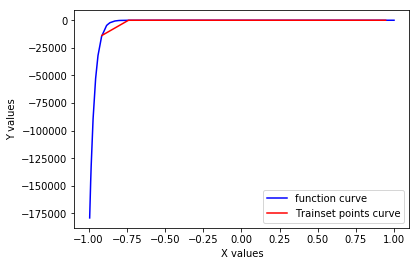

In [419]:
###########################################################################
# Task 4 Step 2 part 1 
visualize_function(45,-1,+1)
plt.plot(X_train,y_train,'r',label="Trainset points curve")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()

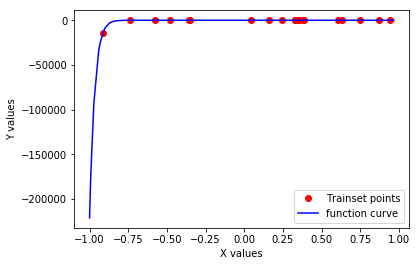

In [420]:
# Task 4 Step2 part 2 
# Plotting points of X_train and y_train
plt.plot(X_train,y_train,'ro',label="Trainset points")
visualize_function(45,-1,+1)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()

In [421]:

# Task 4. Step 3 part 1---MODEL with degree 2
###############################################################
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

degree=2

poly = PolynomialFeatures(degree)
X_train=X_train.reshape(len(X_train),1)
# print("X train is : ",X_train)
X=poly.fit_transform(X_train).reshape(len(X_train),degree+1)
# print("X is : ",X)
reg = LinearRegression().fit(X, y_train)
# train_accuracy_2=reg.score(X, y_train)
y_pred=reg.predict(X)
trainerror2=mean_squared_error(y_train,y_pred)
print("Training error for Degree 2 Model is : ",mean_squared_error(y_train,y_pred))

poly = PolynomialFeatures(degree)
X_test=X_test.reshape(len(X_test),1)
X=poly.fit_transform(X_test).reshape(len(X_test),degree+1)
y_pred=reg.predict(X)
# test_accuracy_2= reg.score(X, y_test)
testerror2=mean_squared_error(y_test,y_pred)
print("Testing error for Degree 2 Model  is : ",mean_squared_error(y_test,y_pred))

# print(reg.coef_)
# print(reg.intercept_) 

Training error for Degree 2 Model is :  4902963.850862393
Testing error for Degree 2 Model  is :  38899194.879502855


In [422]:
# Task 4 . step 3. part 2.--> model with  degree 10
###############################################################
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

degree=10

poly = PolynomialFeatures(degree)
X_train=X_train.reshape(len(X_train),1)
# print("X train is : ",X_train)
X=poly.fit_transform(X_train).reshape(len(X_train),degree+1)
# print("X is : ",X)
reg = LinearRegression().fit(X, y_train)
# train_accuracy_10=reg.score(X, y_train)
y_pred=reg.predict(X)
trainerror10 = mean_squared_error(y_train,y_pred)
print("Training error for Degree 10 Model is : ",mean_squared_error(y_train,y_pred))

poly = PolynomialFeatures(degree)
X_test=X_test.reshape(len(X_test),1)
X=poly.fit_transform(X_test).reshape(len(X_test),degree+1)
y_pred=reg.predict(X)
# test_accuracy_10= reg.score(X, y_test)
testerror10 = mean_squared_error(y_test,y_pred)
print("Testing error for Degree 10 Model  is : ",mean_squared_error(y_test,y_pred))

# print(reg.coef_)
# print(reg.intercept_) 

Training error for Degree 10 Model is :  110.11992039087431
Testing error for Degree 10 Model  is :  8331492.639058905


In [423]:

print("Degree   Training Error Testing Error")
print("  2        {0:1f}       {1:3f}".format(trainerror2,testerror2))
print("  10       {0:1f}       {1:3f}".format(trainerror10,testerror10))

Degree   Training Error Testing Error
  2        4902963.850862       38899194.879503
  10       110.119920       8331492.639059


The result was indeed surprising at first glance!!! The reason is again the same. The dataset was generated with degree equals 45 and thus in dataset while generating y=w0*1 + w1*x^1 +w2*x^2 + w3*x^3 + w4*x^4 + ....w45*x^45 which means y has 45 degrees of freedom and it will take various weights and complexity of dataset would increase to a great extent.
Also we know that in degree = 2 , y=w0*1 + w1*x^1 +w2*x^2 , so it tries its best to match train but just cannot!! as it has only 2 degrees of freedom , while for model with degree equals 10 , we have y=w0*1 + w1*x^1 +w2*x^2 + w3*x^3 + w4*x^4 + ....w10*x^10 and thus it can have less training error as compared to 2 as it has 10 degrees of freedom to twist and turn as per dataset.  
Also a noteworthy thing we noticed is testing error overall increased as degrees of model increased!!!! The reason is simple. OVERFITTING. The model with higher degrees are trying to overlearn or overfit the data and thus its facing issues when we give testdat

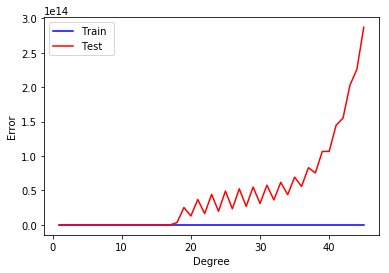

In [424]:
# Task 3 : 
###############################################################
print("The result was indeed surprising at first glance!!! The reason is again the same. The dataset was generated with degree equals 45 and thus in dataset while generating y=w0*1 + w1*x^1 +w2*x^2 + w3*x^3 + w4*x^4 + ....w45*x^45 which means y has 45 degrees of freedom and it will take various weights and complexity of dataset would increase to a great extent.")
print("Also we know that in degree = 2 , y=w0*1 + w1*x^1 +w2*x^2 , so it tries its best to match train but just cannot!! as it has only 2 degrees of freedom , while for model with degree equals 10 , we have y=w0*1 + w1*x^1 +w2*x^2 + w3*x^3 + w4*x^4 + ....w10*x^10 and thus it can have less training error as compared to 2 as it has 10 degrees of freedom to twist and turn as per dataset.  ")
print("Also a noteworthy thing we noticed is testing error overall increased as degrees of model increased!!!! The reason is simple. OVERFITTING. The model with higher degrees are trying to overlearn or overfit the data and thus its facing issues when we give testdata to it. ")
print("###################################")
print("MOST IMPORTANT POINT NOTICED:")
print("After running models for different degrees and plotting different graphs, I concluded following points:")
print(" No matter how many times we run the model, The training error always DECREASES as we increase the degree of model, as model with higher degrees will have more degrees of freedom to bent the model as per dataset")
print("MANY TIMES  if the degree increases, after some time the model will be seen overfitting and it will increase testing error to a much greater extent")
print(" Testing error SOMETIMES decreases with increase in degrees(20% chances in my experiment). YES This happened as well!!")
print("So, overall there is no certainity in relative accuracies of models with different degrees for testing data as we are generating random values and the result may vary by vast amount!!!")
print("####################################")
print("Below I have plotted graph for degree=1 to 46 training and testing error. ")
print("Important points to note from graph is : After certain point the error rate is increased by much much larger extent and this is all due to overfitting!!!")
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

trainerrorlist=[]
testerrorlist=[]
for degree in range(1,46):
    poly = PolynomialFeatures(degree)
    X_train=X_train.reshape(len(X_train),1)
    # print("X train is : ",X_train)
    X=poly.fit_transform(X_train).reshape(len(X_train),degree+1)
    # print("X is : ",X)
    reg = LinearRegression().fit(X, y_train)
    # train_accuracy_10=reg.score(X, y_train)
    y_pred=reg.predict(X)
    trainerror = mean_squared_error(y_train,y_pred)
    trainerrorlist.append(trainerror)
#     print("Training error for Degree 10 Model is : ",mean_squared_error(y_train,y_pred))

    poly = PolynomialFeatures(degree)
    X_test=X_test.reshape(len(X_test),1)
    X=poly.fit_transform(X_test).reshape(len(X_test),degree+1)
    y_pred=reg.predict(X)
    # test_accuracy_10= reg.score(X, y_test)
    testerror = mean_squared_error(y_test,y_pred)
    testerrorlist.append(testerror)
#     print("Testing error for Degree 10 Model  is : ",mean_squared_error(y_test,y_pred))
degree=[x for x in range(1,46)]
plt.plot(degree,trainerrorlist,'b',label="Train ")
plt.plot(degree,testerrorlist,'r',label="Test")
plt.xlabel("Degree")
plt.ylabel("Error")
plt.legend()
# print(reg.coef_)
    # print(reg.intercept_) 